In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/mouse_viral_study.csv")

In [3]:
df.head()

Med_1_mL  Med_2_mL  Virus Present
0  6.508231  8.582531              0
1  4.126116  3.073459              1
2  6.427870  6.369758              0
3  3.672953  4.905215              1
4  1.580321  2.440562              1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


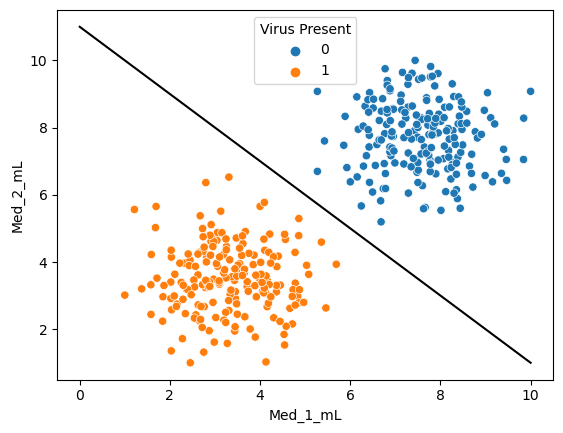

In [5]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

#Draw 2D hyperplace
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

In [6]:
from sklearn.svm import SVC

In [7]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [8]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

In [9]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [10]:
from svm_margin_plot import plot_svm_boundary

In [ ]:
plot_svm_boundary(model,X,y)

In [ ]:
model = SVC(kernel='linear', C=0.05) #Note this C value, when it decreases some values are thru margin.
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [ ]:
model = SVC(kernel='rbf', C=1) #Note this C value, when it decreases some values are thru margin.
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [ ]:
model = SVC(kernel='rbf', C=1,gamma='scale') #Note this C value, when it decreases some values are thru margin.
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [ ]:
model = SVC(kernel='rbf', C=1,gamma='auto') #Note this C value, when it decreases some values are thru margin.
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [ ]:
model = SVC(kernel='poly', degree=1,C=0.05) #Note this C value, when it decreases some values are thru margin.
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [ ]:
model = SVC(kernel='poly', degree=4,C=0.5) #Note this C value, when it decreases some values are thru margin.
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','poly','rbf']}
grid = GridSearchCV(svm,param_grid)
grid.fit(X,y)
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}